# Projekt 1 Metody numeryczne
## Jakub Włostowski 171559

-15.524250000000103 %


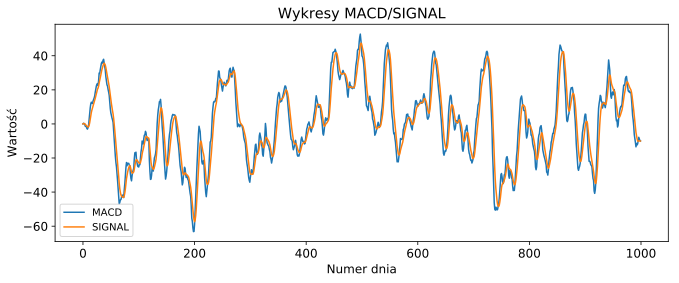

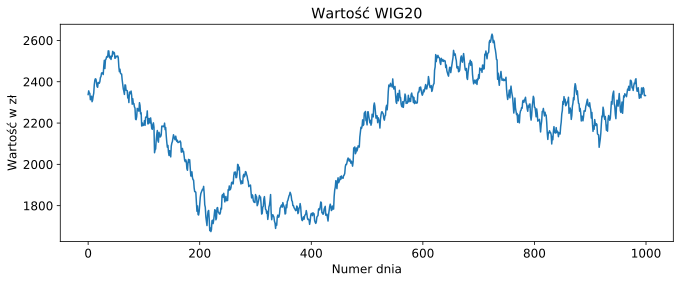

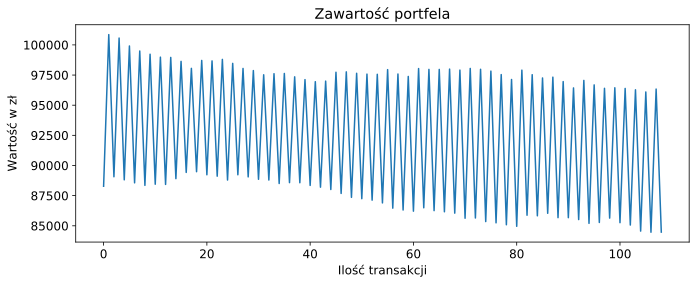

In [3]:


import pandas as pd

def ema(numberOfDays, samples, day):
    alfa = 2/(numberOfDays + 1)
    numerator = 0
    denominator = 0
    if day > numberOfDays:
        for i in range(day, day - numberOfDays - 1, -1):
            numerator += pow(1 - alfa, day - i) * samples[i]
            denominator += pow(1 - alfa, day - i)
    else:
        for i in range(day, - 1, -1):
            numerator += pow(1 - alfa, day - i) * samples[i]
            denominator += pow(1 - alfa, day - i)
    value = numerator/denominator
    return value


def macd(samples, day):
    return ema(12, samples, day) - ema(26, samples, day)


def signal(samples, day):
    return ema(9, samples, day)




wigData = pd.read_csv("wig.csv")

wig_list = wigData['Cena']

macd_list = []

for i in range(len(wigData)):
    macd_list.append(macd(wigData.values, i))

signal_list = []

for i in range(len(wigData)):
    signal_list.append(signal(macd_list, i))




money = 100000
money_begin = money;
money_list = []
stock_counter = 0
macd_higher = False
if(macd_list[0] > signal_list[0]):
    macd_higher = True

for i in range(1000):
    if(i >=1):
        sub = macd_list[i] - signal_list[i]
        sub2 = macd_list[i-1] - signal_list[i-1]

        if (macd_higher == False):
            if (sub > 0 and sub2 < 0):
                for k in range(5):
                    money -= wig_list[i]
                    stock_counter += 1
                money_list.append(money)
                macd_higher = True
        elif(macd_higher == True):
            if (sub < 0 and sub2 > 0):
                macd_higher = False
                for j in range(stock_counter):
                    money += wig_list[i]
                    stock_counter -= 1
                money_list.append(money)

print((money - money_begin) / money_begin * 100, "%")


from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('pdf', 'svg')

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(macd_list, label = 'MACD')
plt.plot(signal_list, label = 'SIGNAL')
plt.legend(loc='best', fontsize = 10)
plt.title('Wykresy MACD/SIGNAL')
plt.xlabel('Numer dnia')
plt.ylabel('Wartość')
plt.show()
plt.plot(wig_list)
plt.title('Wartość WIG20')
plt.xlabel('Numer dnia')
plt.ylabel('Wartość w zł')
plt.show()
plt.plot(money_list)
plt.title('Zawartość portfela')
plt.xlabel('Ilość transakcji')
plt.ylabel('Wartość w zł')
plt.show()


# Wstęp

Do wykonania tego projektu używałem języka Python, a do rysowania wykresów narzędzia Jupyter Notebook. Jako dane wejściowe przyjąłem wartości indeksu giełdowego WIG20 począwszy od początku marca 2015 roku do początku marca 2019 roku. Powyżej przedstawione są kolejno wykresy: wskaźnika giełdowego MACD oraz Signal, wartości indeksu WIG20, zawartości portfela po zastosowaniu algorytmu kupna i sprzedaży. Do liczenia wykładniczej średniej kroczącej wykorzystałem dany wzór: 
$$EMA_{N} =\frac{p_{0} +(1 - {\alpha})^2 + ... + (1 - {\alpha})^N p_{N}}{1 + (1 - {\alpha}) + (1 - {\alpha})^2 + ... + (1 - {\alpha})^N}$$
$$N = \frac{2}{N+1}$$
N - liczba okresów

$$MACD = EMA_{12} - EMA_{26}$$
Drugim składnikiem wskaźnika MACD jest Signal, który jest wykładniczą średnią kroczącą o okresie 9 policzoną z Macd.

# Analiza techniczna wskaźnika MACD

W trakcie analizy branych pod uwagę jest 1000 próbek. Miejsce, w którym MACD przecina SIGNAL od
dołu jest sygnałem do zakupu akcji. Miejsce, w którym MACD przecina SIGNAL od góry, jest sygnałem do sprzedaży akcji.
Kiedy wartość indeksu WIG20 spada to jak możemy zauważyć na wykresach wskaźnik MACD i SIGNAL spadają bardzo gwałtownie. Kiedy  wartości indeksu WIG20 gwałtownie rosną lub gwałtownie maleją wykresy MACD i SIGNAL najczęściej się pokrywają. Przy zmianie linii trendu wartości WIG20 w większości przypadków następuje przecięcie obu wykresów i zostaje wygenerowany sygnał kupna/sprzedaży. Wskaźnik MACD, mimo stosunkowo dużej wiarygodności główną wadą są ich wyraźne opóźnienia, które można zaobserwować na wykresie. Kupowanie lub sprzedawanie za każdym razem, gdy przecinają się linie wykresów MACD i SIGNAL nie jest nam w stanie zagwarantować pewnego zysku. Gdyby taka sytuacja miała miejsce samo inwestowanie na giełdzie nie miałaby najmniejszego sensu, ponieważ każda osoba zarabiałaby nic nigdy nie tracąc. W trakcie analizy przydatności wskaźnika MACD ważne są też inne czynniki takie jak np. badanie kąta pomiędzy sąsiednimi wartościami wykresu MACD i kupowanie tam gdzie występuje między nimi kąt ostry. Warto również zwrócić uwagę na tworzącą się linię trendu wykresu. Według mnie trafność wskaźnika MACD zależy od bardzo wielu czynników, które nigdy nie są do końca dokładne i nie do końca nadaje się do inwestycji opartych tylko na nim, można go stosować jako punkt odniesienia.




# Algorytm sprzedaży/kupna

Zaproponowany przeze mnie algorytm bierze pod uwagę znaną metodę, która polega na analizie przecinania się wykresów MACD i SIGNAL(opisany wyżej). Algorytm zawsze kupuje tyle po 5 akcji oraz sprzedaje tyle ile ma akcji. Kapitałem poaczątkowym jest 100 000 jednostek, algorytm testowany jest na 1000 dniach. Jak widzimy na wykresie przeprowadzonych zostało ponad 100 transakcji kupna lub sprzedaży. Niestety po tym okresie generowane są straty w wysokości około 15.5%. Jest to spowodowane niedoskonałością tego algorytmu. Aby zaczął przynosić lepsze efekty powinno się wziąć pod uwagę znacznie więcej czynników takich jak podane wcześniej analizę kąta pomiędzy sąsiednimi wartościami wykresu MACD.

# Wnioski

Przez występujące opóźnienia w generowanych sygnałach wskaźnika MACD nadaje się on znacznie bardziej do inwestycji długterminowych, ponieważ są one mniej istotne na dłuższym odcinku czasu. Symulacje z użyciem wskaźnika MACD nie są w stu procentach adekwatne do tego co się dzieje w rzeczywistości. Ogólnie pojęte inwestowanie na giełdzie, czy to sprzedaż, czy kupno akcji wiąże się z wpływem na tęże giełdę. Symulacja z użyciem wskaźnika MACD nie bierze pod uwagę takich zdarzeń.